#IS 670 Lab 3: Decision Tree

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

###1. Upload and clean data

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
# Read data
car_kick = pd.read_csv("/content/drive/MyDrive/IS670_Vishakha/car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [5]:
car_kick.keys()

Index(['PurchDate', 'VehYear', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost', 'Auction', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1',
       'VNST', 'IsOnlineSale', 'IsBadBuy'],
      dtype='object')

In [6]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
car_kick_desired = car_kick [desired_columns]

In [7]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction = car_kick_desired.copy() #why?
carAuction.loc[:, 'IsBadBuy'] = carAuction['IsBadBuy'].replace({0: 'No', 1: 'Yes'})

In [8]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,No,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,No,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,No,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,No,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,No,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [9]:
# Examine missing values again
carAuction.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [10]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [11]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [12]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

###2. Partition the data set for Decision Tree model

In [13]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,No,3688,3680,4,89127,983,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,No,6868,7170,3,71271,1974,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,No,7801,7670,2,83338,2152,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,No,7355,7165,2,58698,1500,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,Yes,6326,6680,2,56072,1086,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
67207,Yes,7505,8265,6,94232,909,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
67208,Yes,3106,4950,6,79534,1506,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
67209,Yes,3534,5220,7,79394,3967,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [14]:
# Examine the porportion of target variable for data set
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

No     0.904539
Yes    0.095461
Name: IsBadBuy, dtype: float64


In [15]:
# Partition the data
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(47047, 38) (20164, 38) (47047,) (20164,)


In [16]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [17]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

No     0.5
Yes    0.5
Name: IsBadBuy, dtype: float64 (8838,)


In [18]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

No     0.900962
Yes    0.099038
Name: IsBadBuy, dtype: float64


## 3. Decision Tree model prediction

In [19]:
# Build a decision tree model on training data with max_depth = 2
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'VehicleAge <= 4.5\nentropy = 1.0\nsamples = 8838\nvalue = [4419, 4419]\nclass = No'),
 Text(0.25, 0.5, 'VehicleAge <= 2.5\nentropy = 0.958\nsamples = 4577\nvalue = [2840, 1737]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.81\nsamples = 1060\nvalue = [796, 264]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.981\nsamples = 3517\nvalue = [2044, 1473]\nclass = No'),
 Text(0.75, 0.5, 'VehBCost <= 4782.5\nentropy = 0.951\nsamples = 4261\nvalue = [1579, 2682]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.869\nsamples = 1411\nvalue = [410, 1001]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.977\nsamples = 2850\nvalue = [1169, 1681]\nclass = Yes')]

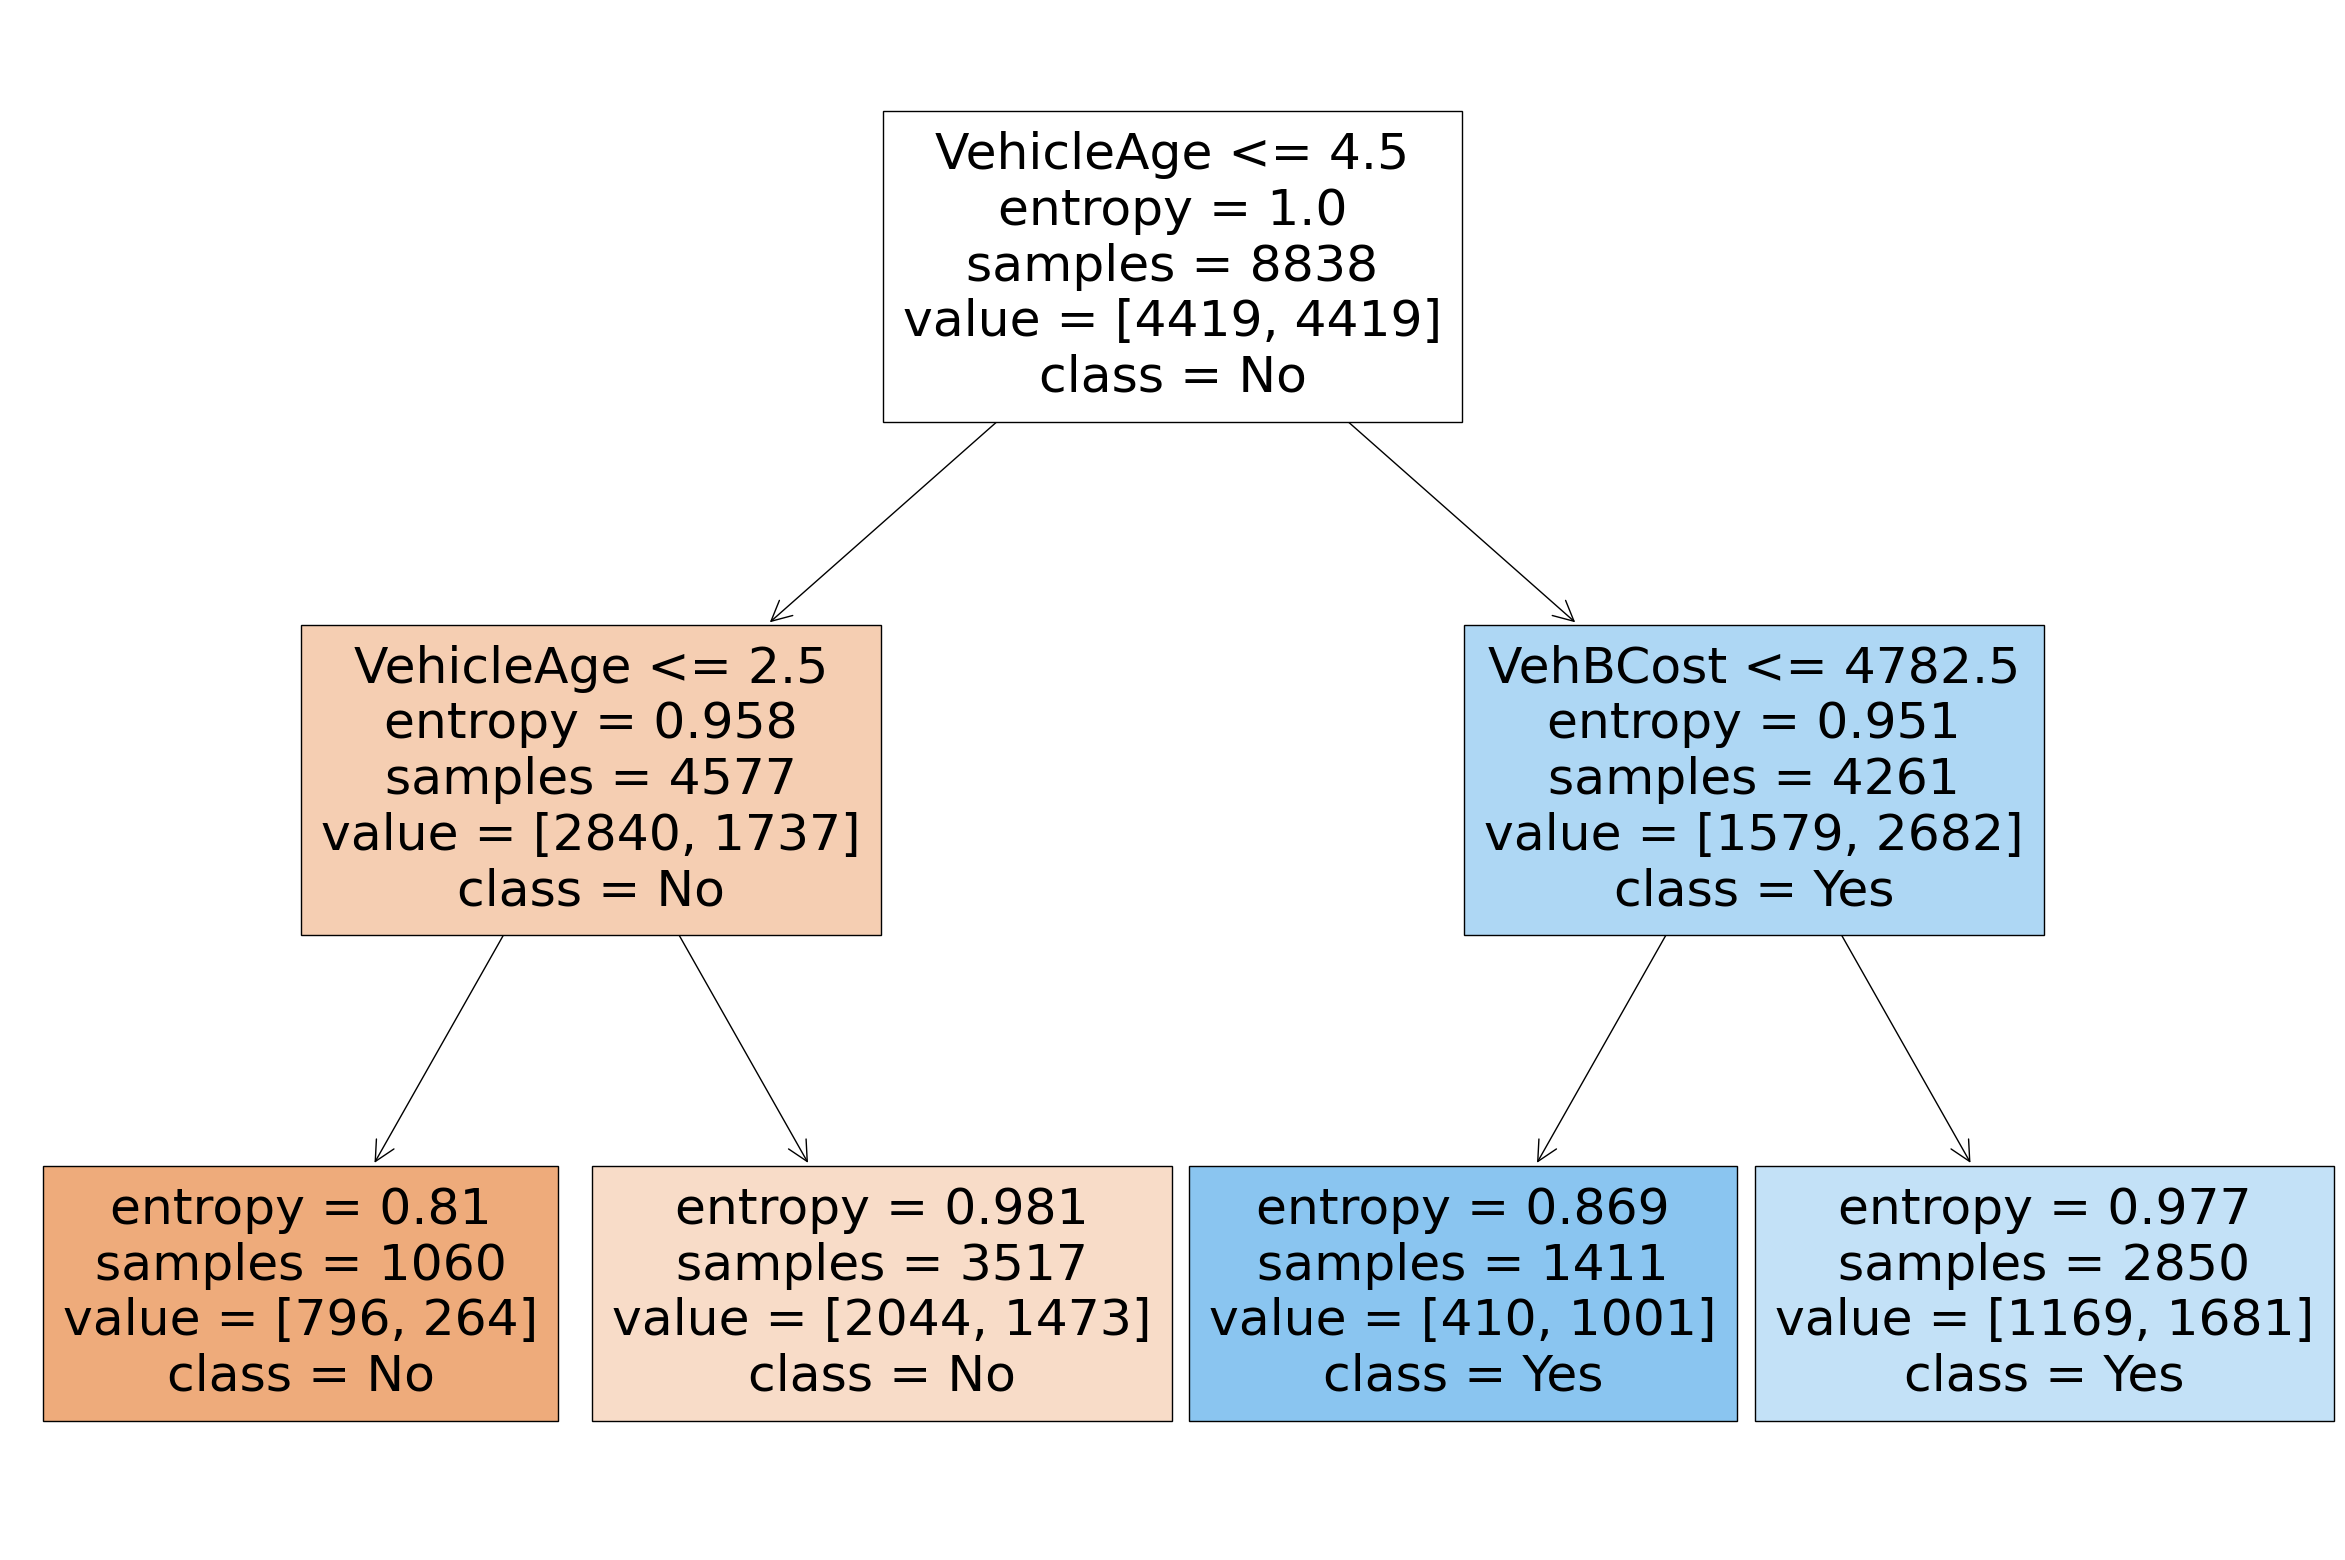

In [20]:
# Plot the tree (0.5 pts)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [21]:
# Text version of decision tree (0.5 pts)
print(tree.export_text(model, feature_names=list(carAuction.columns)[1:]))

|--- VehicleAge <= 4.50
|   |--- VehicleAge <= 2.50
|   |   |--- class: No
|   |--- VehicleAge >  2.50
|   |   |--- class: No
|--- VehicleAge >  4.50
|   |--- VehBCost <= 4782.50
|   |   |--- class: Yes
|   |--- VehBCost >  4782.50
|   |   |--- class: Yes



Q1. How many decision nodes and how many leaf nodes are in the tree?  (0.5 pts)<br>

There are 3 decision nodes & 4 leaf nodes.

Q2. Compare to a decision tree with 7 decision nodes and 8 leaf nodes, is it more or less complex? Give reasons for your answer. (1 pt)<br>
In general, the complexity of a decision tree is influenced by several factors:

- Number of Nodes: This includes both decision nodes and leaf nodes. In this case, the decision tree has a total of 15 nodes (7 decision nodes + 8 leaf nodes).

- Depth of the Tree: The depth of the tree refers to the longest path from the root node to a leaf node. The deeper the tree, the more complex it tends to be.

Given that the decision tree has a relatively small number of nodes (15 in total), it is likely not overly complex compared to larger decision trees commonly encountered in practice. However, the complexity of the decision tree also depends on the depth and the intricacy of the decision boundaries it creates.

However, based solely on the number of nodes, a decision tree with 7 decision nodes and 8 leaf nodes is likely to be relatively simple.

Q3. What is the predictor that first splits the tree? How the decision tree selects the first predictor to split? (1 pt)<br>

The predictor is vehicleAge and it decision tree selects the first predictor to split basis on the entropy.

Q4. Find one path in the tree to a leaf node that is classified to IsBadBuy = 'Yes'. What is this path/rule's misclassification error rate? (1 pt)<br>

VehicleAge->VehBCost

In [22]:
# Make predictions on testing data (0.5 pts)
prediction_on_test = model.predict(predictors_test)

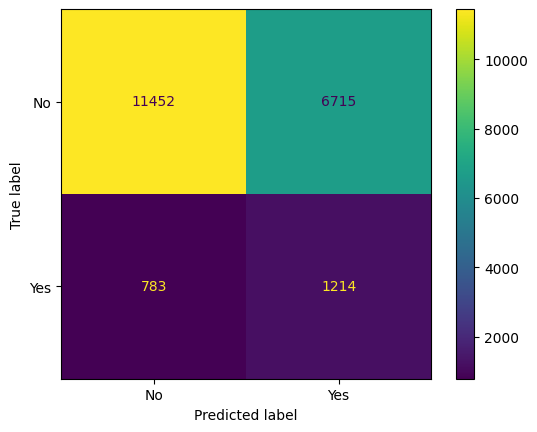

In [26]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 pts)
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

Q5. On the testing set, how many bad buy cars are predicted as Not bad buy? (0.5 pts)<br>
814

In [27]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 pts)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.94      0.63      0.75     18167
         Yes       0.15      0.61      0.24      1997

    accuracy                           0.63     20164
   macro avg       0.54      0.62      0.50     20164
weighted avg       0.86      0.63      0.70     20164



Q6. Does the decision tree model have better performance on majority (IsBadBuy = 'No') or minority class (IsBadBuy = 'Yes')? why? (1 pt)<br>
Yes decision tree model have better performance on majority due to higher precision.

Q7. Explain the overal performance of this model. Is this a good model? How can we improve it? (1 pt)

In the context of decision trees, a model achieving around 63% accuracy could be considered fair but not necessarily excellent, indicating potential room for improvement. To enhance the decision tree's performance, pruning techniques like cost-complexity pruning can help simplify overly complex trees and mitigate overfitting. Additionally, feature selection methods can be employed to identify and prioritize the most relevant features for classification. Ensemble methods such as Random Forests or Gradient Boosted Trees offer avenues to improve predictive accuracy by aggregating the outputs of multiple decision trees. Tuning parameters such as maximum depth and minimum samples per leaf can optimize the decision tree's performance, while addressing imbalanced data through sampling techniques or weighted classes can improve its ability to generalize patterns across different classes. By strategically applying these techniques, the decision tree model can be refined to achieve better overall performance and predictive capability.

Q8. Build a decision tree model using training data, setting the maximum depth to 3, and assess its performance against the earlier model. Discuss which model you would favor and why. (2 pts)

We would prefer the second model as the number of false prediction are less in second model.

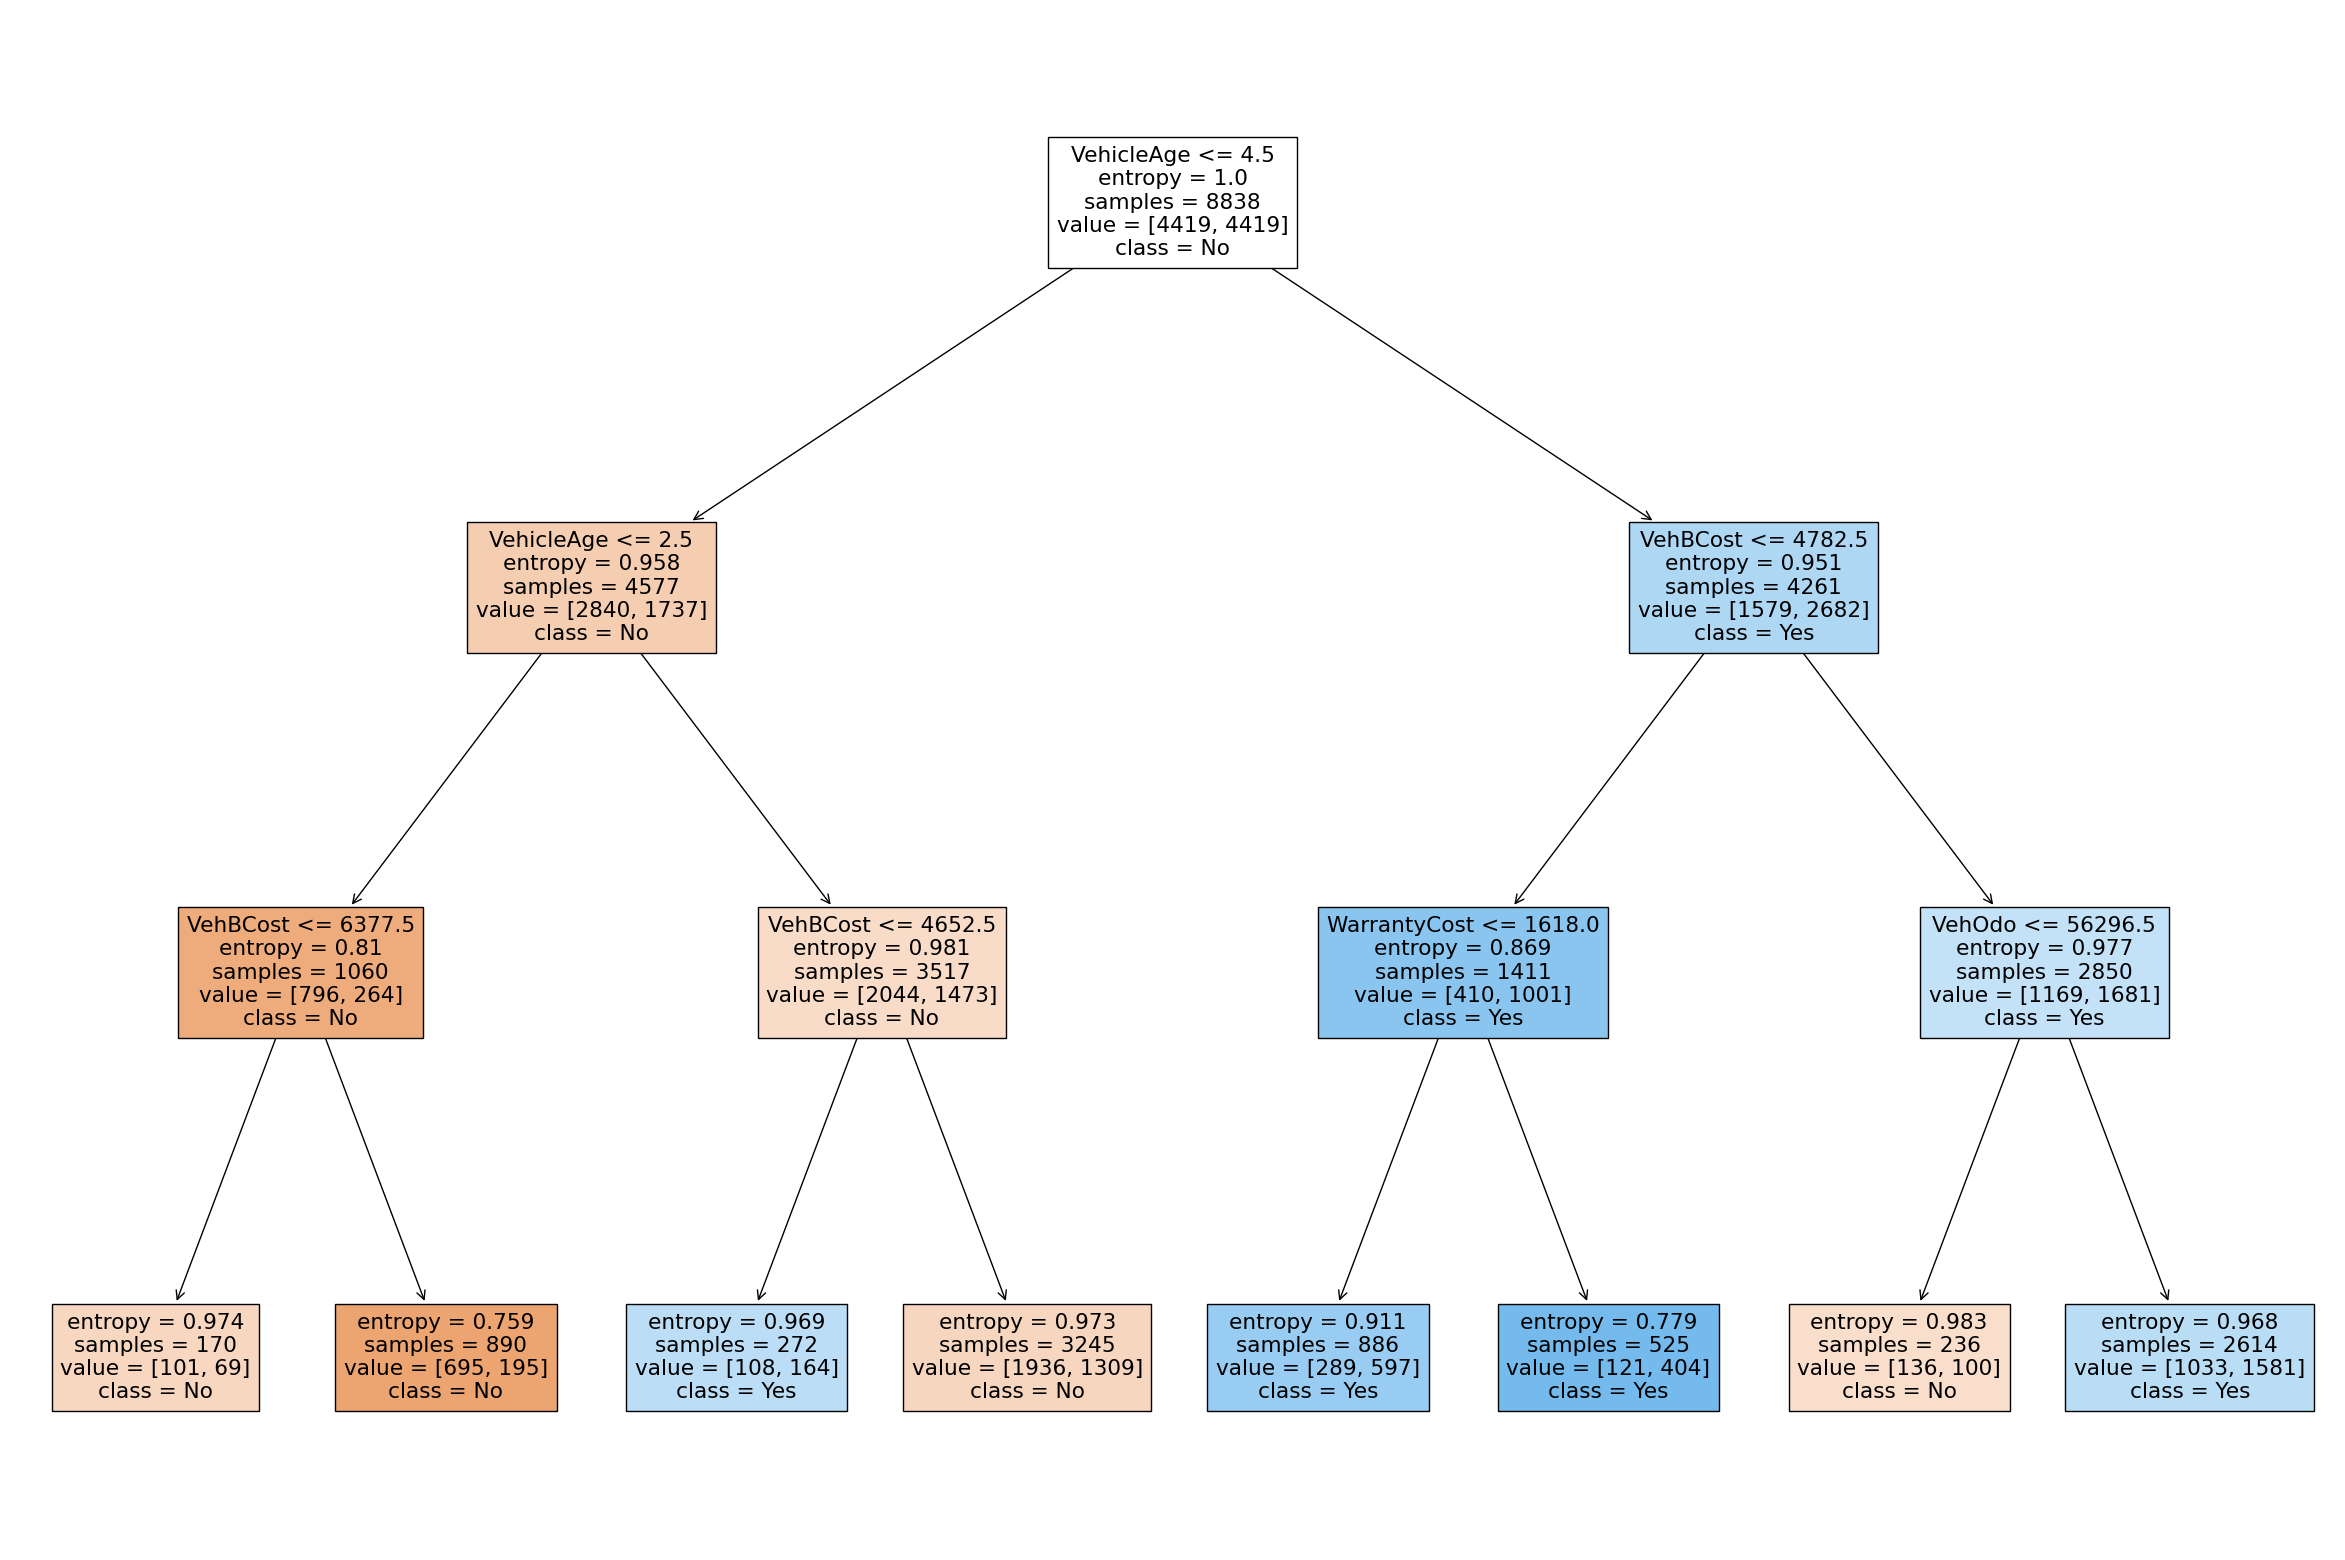

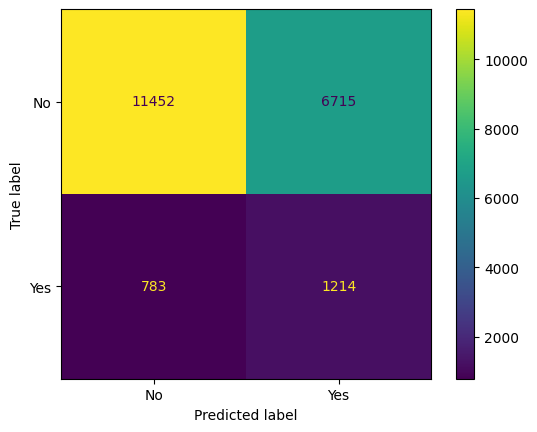

In [28]:
# Q8
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model.fit(predictors_train, target_train)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)
prediction_on_test = model.predict(predictors_test)
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [29]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/IS670_lab03.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IS670_lab03.ipynb to html
[NbConvertApp] Writing 1534714 bytes to /content/drive/MyDrive/Colab Notebooks/IS670_lab03.html
